# Hierarchical Clustering
---

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from matplotlib import rcParams 
rcParams['figure.figsize'] = 15, 5 
sns.set_style('darkgrid')

In [3]:
cc_df = pd.read_csv('cc.csv')

In [4]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
cc_df.drop('CUST_ID', axis = 1, inplace=True)  
cc_df['MINIMUM_PAYMENTS'].fillna(value=cc_df['MINIMUM_PAYMENTS'].mean(), inplace = True)  
cc_df['CREDIT_LIMIT'].fillna(value=cc_df['CREDIT_LIMIT'].mean(), inplace = True)  
cc_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

Drop customer ID because it provides us no useful information. Impute minimum payments and credit limits. The small number of null values make the mean a good choice for dealing with the nulls.

In [6]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
cc_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler, normalize 
 
scaler = StandardScaler()  
scaled_df = scaler.fit_transform(cc_df)  
   
normalized_df = normalize(scaled_df)  
 
# Converting the scaled data back into a pandas DataFrame  
normalized_df = pd.DataFrame(data=normalized_df)

In [10]:
from sklearn.decomposition import PCA 
 
pca = PCA(n_components = 2)  
X_principal = pca.fit_transform(normalized_df)  
X_principal = pd.DataFrame(X_principal)  
X_principal.columns = ['P1', 'P2']  
   
X_principal.head()

P1        P2
0 -0.489825 -0.679679
1 -0.518791  0.545011
2  0.330885  0.268977
3 -0.482373 -0.092113
4 -0.563289 -0.481915

Principle component analysis decreases the dimensionality or complexity of a model to avoid overfitting. This can happen when there are a large number of attributes 

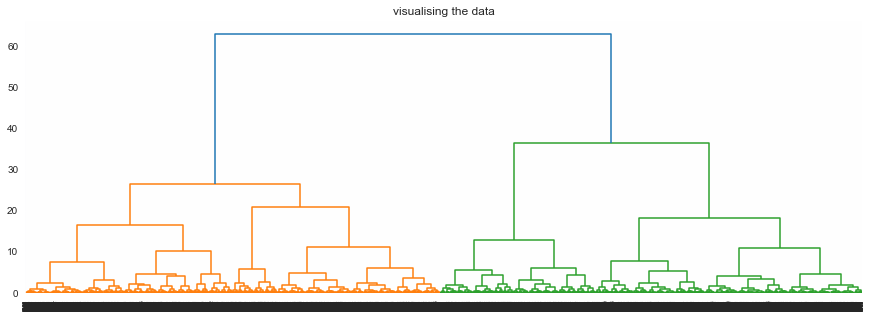

In [11]:
import scipy.cluster.hierarchy as shc 
 
plt.title('visualising the data')  
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

The dendrogram is a visual representation of the compound correlation data. The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children

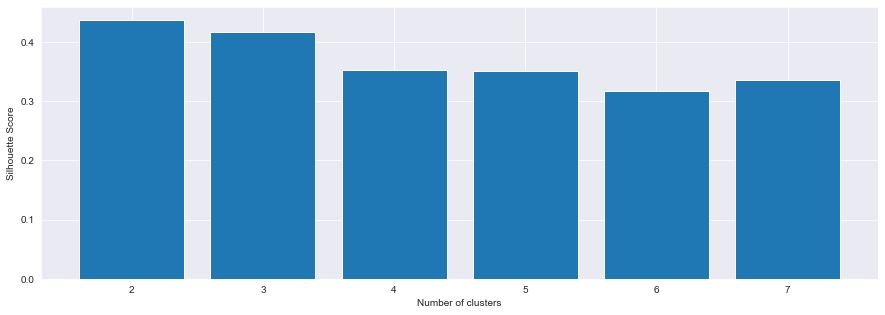

In [24]:
from sklearn.cluster import AgglomerativeClustering  
from sklearn.metrics import silhouette_score 
 
# where we'll save scores for later plotting 
silhouette_scores = []  
 
# testing different cluster values in range [2,8﴿ 
for n_cluster in range(2, 8): 
    silhouette_scores.append(silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal)))
     
# Creating bar graph to compare the results. You can use a line plot if you prefer ﴾similar to K Means lab﴿ 
plt.bar(x=range(2, 8), height=silhouette_scores)  
plt.xlabel('Number of clusters')  
plt.ylabel('Silhouette Score')  
plt.show()  

In [25]:
# creating and fitting model 
agg = AgglomerativeClustering(n_clusters=3) 
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

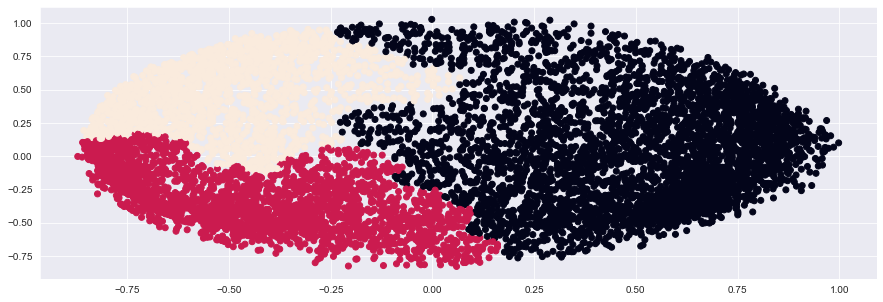

In [26]:
# Visualizing the clustering  
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal))  
plt.show() 

In [27]:
# creating and fitting model 
agg = AgglomerativeClustering(n_clusters=4) 
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=4)

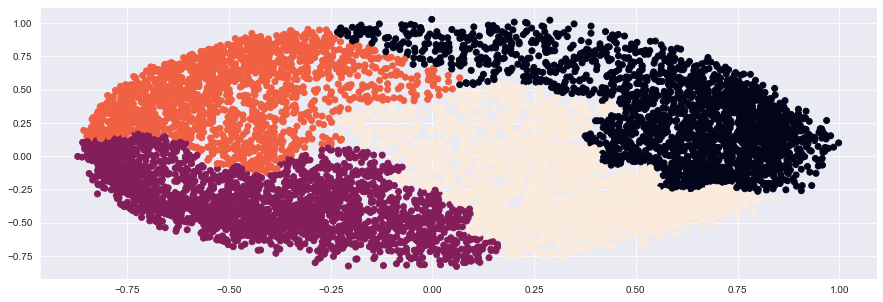

In [29]:
# Visualizing the clustering  
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = AgglomerativeClustering(n_clusters = 4).fit_predict(X_principal))  
plt.show() 

In [30]:
# creating and fitting model 
agg = AgglomerativeClustering(n_clusters=6) 
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=6)

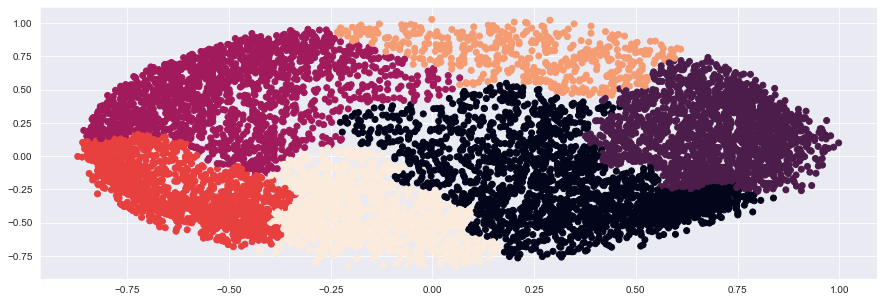

In [31]:
# Visualizing the clustering  
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = AgglomerativeClustering(n_clusters = 6).fit_predict(X_principal))  
plt.show() 

Higher Silhouette Score seems better, closer to 1 means the clusters are separate so in this case 2 clusters should be the most ideal rather than these other options

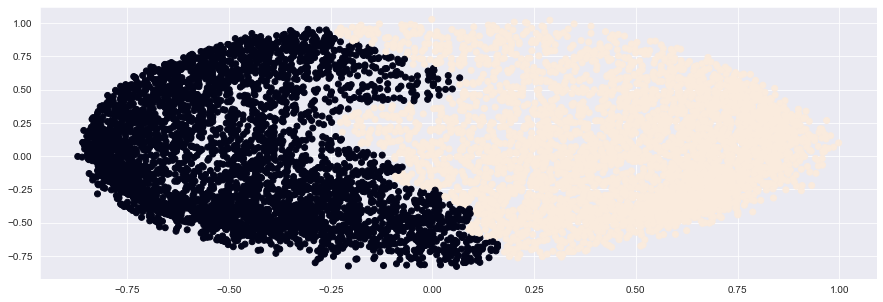

In [32]:
# creating and fitting model 
agg = AgglomerativeClustering(n_clusters=2) 
agg.fit(X_principal)

# Visualizing the clustering  
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = AgglomerativeClustering(n_clusters = 2).fit_predict(X_principal))  
plt.show() 